# Introduction
Our data was collected by the Hungarian Institute of Cardiology in Budapest on Heart Disease patients.
Heart disease can refer to several types of heart conditions, the most common being the buildup of plaque in the major blood vessels leading to the heart. Cholesterol deposits in the arteries reduce blood flow to the heart. 
Our project aims to determine if someone has heart disease, based on some of the predictors in the dataset.
We will be using the Heart Disease data folder. Specifically,  we are using the Processed Hungarian Data, which is a data set in the Heart Disease folder.

# Preliminary Data Analysis and Methods
To conduct our data analysis, we will filter out the columns with mostly missing data, which are the slope of the peak exercise ST segment, number of major vessels coloured by fluoroscopy, and thal. Additionally, if there is a patient with a missing value in any other column, we will filter that specific patient out as well.  Doing so will ensure our results are consistent for each patient.  Therefore, we will use these columns: age, sex , chest pain type, resting blood pressure,  serum cholestorol levels,  fasting blood sugar, resting electrocardiographic results,maximum heart rate achieved, exercise induced angina, and ST depression induced by exercise relative to rest.
We can plot 2 relevant predictors such as age and max heart rate values onto a scatter plot using ggplot(). Then, we can colour code the points that have heart disease and the points that do not. That way, we can see if these predictors have an effect on whether someone has heart disease.

In the code below, we read the data from the url, clean and wrangle it, remove unnecessary data, split it into training and testing sets, compute summary statistics on the training data, standardize the training data, and then plot 2 of the standardized predictors (age and max heart rate) onto a scatter plot and colour the points based on whether the individual has heart disease. The summary statistics were computed by grouping the rows based on whether the individual has heart disease and then computing the means of the relevant predictors.

In [1]:
library(tidyverse)
library(repr)
library(tidymodels)
options(repr.matrix.max.rows = 6)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks r

Rows: 294 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (9): X4, X5, X6, X7, X8, X9, X11, X12, X13
dbl (5): X1, X2, X3, X10, X14

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


age,sex,chest_pain_type,resting_blood_pressure,cholestorol,fasting_blood_sugar,restecg,max_heart_rate,exercise_induced_angina,oldpeak,has_heart_disease
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
28,1,2,130,132,0,2,185,0,0,No
30,0,1,170,237,0,1,170,0,0,No
32,0,2,105,198,0,0,165,0,0,No
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
54,0,3,130,294,0,1,100,1,0,Yes
56,1,4,155,342,1,0,150,1,3,Yes
65,1,4,130,275,0,1,115,1,1,Yes


has_heart_disease,age,sex,resting_blood_pressure,cholestorol,fasting_blood_sugar,max_heart_rate,oldpeak
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
No,46.94262,0.647541,131.6148,240.2705,0.04098361,147.5492,0.2172131
Yes,49.49315,0.890411,135.2877,265.8356,0.13698630,128.5068,1.2876712


.pred_class,age,sex,chest_pain_type,resting_blood_pressure,cholestorol,fasting_blood_sugar,restecg,max_heart_rate,exercise_induced_angina,oldpeak,has_heart_disease
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
No,29,1,2,120,243,0,0,160,0,0,No
No,31,0,2,100,219,0,1,150,0,0,No
No,32,1,2,110,225,0,0,184,0,0,No
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
Yes,47,1,4,160,291,0,1,158,1,3,Yes
Yes,52,1,4,140,266,0,0,134,1,2,Yes
Yes,58,0,2,180,393,0,0,110,1,1,Yes


[1] "here"


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.8181818
kap,binary,0.6195965


age,sex,chest_pain_type,resting_blood_pressure,cholestorol,fasting_blood_sugar,restecg,max_heart_rate,exercise_induced_angina,oldpeak,has_heart_disease
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
-2.512196,0.5935911,-0.9731865,-0.1742372,-1.8547289,-0.287934,3.8304213,1.879150,-0.6729706,-0.6464198,No
-2.259682,-1.6760220,-2.0045527,2.1568947,-0.2021081,-0.287934,1.6591069,1.246858,-0.6729706,-0.6464198,No
-2.007167,-1.6760220,-0.9731865,-1.6311946,-0.8159386,-0.287934,-0.5122075,1.036094,-0.6729706,-0.6464198,No
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
0.7704933,-1.6760220,0.05817963,-0.1742372,0.6950289,-0.287934,1.6591069,-1.7038373,1.478329,-0.6464198,Yes
1.0230079,0.5935911,1.08954577,1.2827202,1.4505127,3.455208,-0.5122075,0.4038021,1.478329,2.4918007,Yes
2.1593235,0.5935911,1.08954577,-0.1742372,0.3959833,-0.287934,1.6591069,-1.0715455,1.478329,0.3996537,Yes


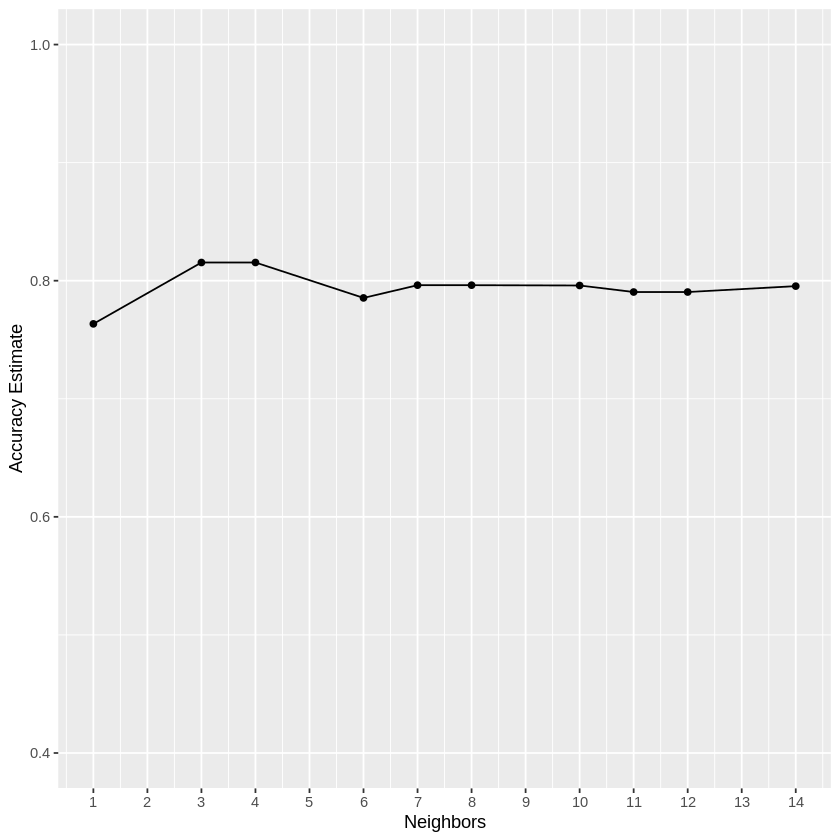

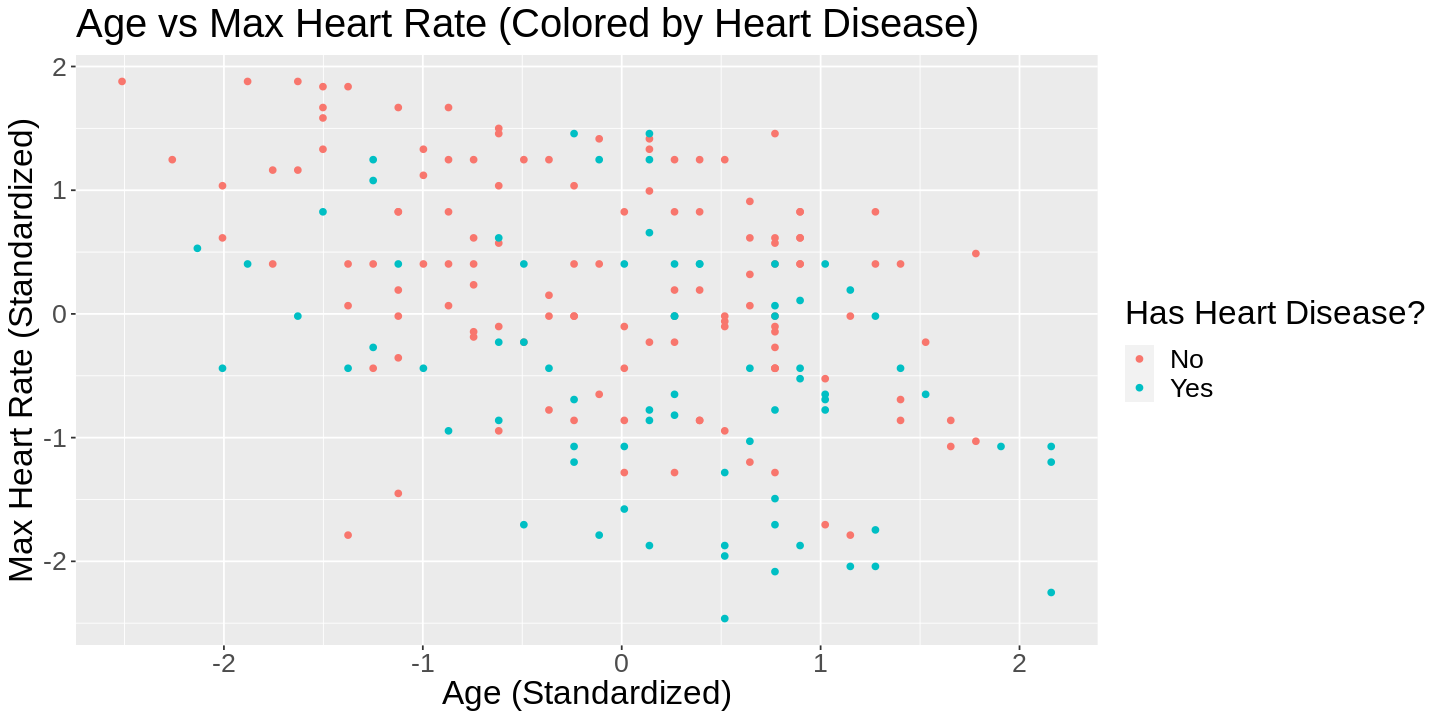

In [2]:
set.seed(1000)

# Read data
url <- "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.hungarian.data"
heart_disease_data <- read_csv(url, col_names = FALSE)

# Add column names
heart_disease_data <- rename(heart_disease_data,
       age = X1, 
       sex = X2, 
       chest_pain_type = X3,
       resting_blood_pressure = X4, 
       cholestorol = X5, 
       fasting_blood_sugar = X6,
       restecg = X7, 
       max_heart_rate = X8, 
       exercise_induced_angina = X9,
       oldpeak = X10, 
       slope = X11, 
       ca = X12,
       thal = X13, 
       has_heart_disease = X14)

# Remove unnecessary columns (these won't be used in our analysis)
heart_disease_data <- heart_disease_data |>
   select(-slope, -ca, -thal)

# Filter out observations with missing data
heart_disease_data <- heart_disease_data |>
   filter(resting_blood_pressure != '?', cholestorol != '?', fasting_blood_sugar != '?', restecg != '?', max_heart_rate != '?', exercise_induced_angina != '?', oldpeak != '?')

# Convert columns to numeric type
heart_disease_data$resting_blood_pressure <- as.numeric(heart_disease_data$resting_blood_pressure)
heart_disease_data$cholestorol <- as.numeric(heart_disease_data$cholestorol)
heart_disease_data$fasting_blood_sugar <- as.numeric(heart_disease_data$fasting_blood_sugar)
heart_disease_data$restecg <- as.numeric(heart_disease_data$restecg)
heart_disease_data$max_heart_rate <- as.numeric(heart_disease_data$max_heart_rate)
heart_disease_data$exercise_induced_angina <- as.numeric(heart_disease_data$exercise_induced_angina)
heart_disease_data$oldpeak <- as.numeric(heart_disease_data$oldpeak)
heart_disease_data$has_heart_disease <- as.factor(heart_disease_data$has_heart_disease)

# Convert heart disease labels from numbers to words
levels(heart_disease_data$has_heart_disease)[levels(heart_disease_data$has_heart_disease) == '0'] <- 'No'
levels(heart_disease_data$has_heart_disease)[levels(heart_disease_data$has_heart_disease) == '1'] <- 'Yes'

# Split the data into training and testing sets
heart_disease_data_split <- initial_split(heart_disease_data, prop = 0.75, strata = has_heart_disease)
heart_disease_data_training <- training(heart_disease_data_split)
heart_disease_data_testing <- testing(heart_disease_data_split)

# Print training data
heart_disease_data_training

# Summarize the training data by grouping by num and calculating means of the various columns
summary <- heart_disease_data_training |>
   group_by(has_heart_disease) |>
   summarize(across(age:oldpeak, mean))

# Remove columns for which mean is not useful (i.e. data is discrete and not continuous)
summary <- summary |>
   select(-chest_pain_type, -restecg, -exercise_induced_angina)

# Print summary statistics
summary

# Select data to visualize
heart_disease_training_plot_data <- heart_disease_data_training #|>
#    select(age, max_heart_rate, has_heart_disease)

# Scale data for effective visualization
heart_disease_recipe <- recipe(has_heart_disease ~ ., data = heart_disease_training_plot_data) |>
   step_scale(all_predictors()) |>
   step_center(all_predictors()) #|>
   #prep()

# Cross Validation
heart_vfold <- vfold_cv(heart_disease_training_plot_data, v = 5, strata = has_heart_disease)

knn_tune <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
      set_engine("kknn") |>
      set_mode("classification")

knn_results <- workflow() |>
      add_recipe(heart_disease_recipe) |>
      add_model(knn_tune) |>
      tune_grid(resamples = heart_vfold, grid = 10) |>
      collect_metrics()

accuracies <- knn_results |> 
      filter(.metric == "accuracy")

accuracy_versus_k <- ggplot(accuracies, aes(x = neighbors, y = mean))+
      geom_point() +
      geom_line() +
      labs(x = "Neighbors", y = "Accuracy Estimate") +
      scale_x_continuous(breaks = seq(0, 14, by = 1)) +  # adjusting the x-axis
      scale_y_continuous(limits = c(0.4, 1.0)) # adjusting the y-axis
accuracy_versus_k

knn_model <- nearest_neighbor(weight_func = "rectangular", neighbors = 3) |>
      set_engine("kknn") |>
      set_mode("classification")

heart_fit <- workflow() |>
      add_recipe(heart_disease_recipe) |>
      add_model(knn_model) |>
      fit(data = heart_disease_training_plot_data)

heart_test_predictions <- predict(heart_fit , heart_disease_data_testing) |>
      bind_cols(heart_disease_data_testing)
heart_test_predictions

heart_prediction_accuracy <- heart_test_predictions |>
        metrics(truth = has_heart_disease, estimate = .pred_class)
print("here")
heart_prediction_accuracy

heart_disease_recipe <- heart_disease_recipe |>
   prep()
scaled_heart_disease_data <- bake(heart_disease_recipe, heart_disease_training_plot_data)

# Print scaled data
scaled_heart_disease_data

# Change plot dimensions
options(repr.plot.width = 12, repr.plot.height = 6)

# Plot data
heart_disease_plot <- scaled_heart_disease_data |>
   ggplot(aes(x = age, y = max_heart_rate, color = has_heart_disease)) +
   geom_point() +
   theme(text = element_text(size = 20)) +
   labs(x = "Age (Standardized)", y = "Max Heart Rate (Standardized)", title = "Age vs Max Heart Rate (Colored by Heart Disease)", color = "Has Heart Disease?")

# Display plot
heart_disease_plot

# Expected Outcomes and Significance

These findings could potentially show new relationships between factors that are known to be related to heart disease. This is impactful, because heart disease is a very common cause of death everywhere. It is important for data scientists in the healthcare industry to uncover as much information about heart disease.

A question this could lead to is whether or not our findings could be applied by heart doctors to help them predict heart disease more accurately.
Another question is whether or not certain predictors have more correlation to heart disease than others.